# Group Name: Data Innovators

## Team Members

### 1. **Stephanie Dawsonn-Andoh**
- **Email**: [stephandoh@gmail.com](mailto:stephandoh@gmail.com)
- **Country**: Ghana
- **Specialization**: Data Analytics

### 2. **Sreedhar Rongala**
- **Email**: [rongalasreedhar@gmail.com](mailto:rongalasreedhar@gmail.com)
- **Country**: India
- **Specialization**: Data Analytics

### 3. **Brittney Smith**
- **Email**: [brittneysintership@gmail.com](mailto:brittneysintership@gmail.com)
- **Country**: USA
- **Specialization**: Data Analytics



In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [2]:
df = pd.read_csv(r"C:\Users\steph\Downloads\Customer Segmentation\Customers.csv")

C:\Users\steph\AppData\Local\Temp\ipykernel_58016\2045430512.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\steph\Downloads\Customer Segmentation\Customers.csv")


In [3]:
df.head(5)

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,1/28/2015,1375586,N,ES,H,35,1/12/2015,0.00,6,1.00,NaN,1.00,A,S,N,NaN,KHL,N,1.00,29.00,MALAGA,1.00,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0
1,1,1/28/2015,1050611,N,ES,V,23,8/10/2012,0.00,35,1.00,NaN,1.00,I,S,S,NaN,KHE,N,1.00,13.00,CIUDAD REAL,0.00,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0
2,2,1/28/2015,1050612,N,ES,V,23,8/10/2012,0.00,35,1.00,NaN,1.00,I,S,N,NaN,KHE,N,1.00,13.00,CIUDAD REAL,0.00,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0
3,3,1/28/2015,1050613,N,ES,H,22,8/10/2012,0.00,35,1.00,NaN,1.00,I,S,N,NaN,KHD,N,1.00,50.00,ZARAGOZA,0.00,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0
4,4,1/28/2015,1050614,N,ES,V,23,8/10/2012,0.00,35,1.00,NaN,1.00,A,S,N,NaN,KHE,N,1.00,50.00,ZARAGOZA,1.00,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0


In [4]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes',
       'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [5]:
# Dictionary to map the Spanish column names to English
column_mapping = {
    "Unnamed: 0": "unnamed_index",
    "fecha_dato": "data_date",
    "ncodpers": "customer_id",
    "ind_empleado": "employee_indicator",
    "pais_residencia": "country_of_residence",
    "sexo": "gender",
    "age": "age",
    "fecha_alta": "signup_date",
    "ind_nuevo": "new_customer_indicator",
    "antiguedad": "seniority",
    "indrel": "primary_relationship_status",
    "ult_fec_cli_1t": "last_date_primary_customer",
    "indrel_1mes": "customer_type_at_month_start",
    "tiprel_1mes": "customer_relation_type",
    "indresi": "resident_indicator",
    "indext": "foreigner_indicator",
    "conyuemp": "spouse_employee_indicator",
    "canal_entrada": "entry_channel",
    "indfall": "deceased_indicator",
    "tipodom": "address_type",
    "cod_prov": "province_code",
    "nomprov": "province_name",
    "ind_actividad_cliente": "customer_activity_index",
    "renta": "income",
    "ind_ahor_fin_ult1": "savings_product_indicator",
    "ind_aval_fin_ult1": "guarantee_product_indicator",
    "ind_cco_fin_ult1": "checking_account_product_indicator",
    "ind_cder_fin_ult1": "derivative_account_product_indicator",
    "ind_cno_fin_ult1": "payroll_account_product_indicator",
    "ind_ctju_fin_ult1": "junior_account_product_indicator",
    "ind_ctma_fin_ult1": "young_account_product_indicator",
    "ind_ctop_fin_ult1": "payroll_pension_account_indicator",
    "ind_ctpp_fin_ult1": "pension_account_product_indicator",
    "ind_deco_fin_ult1": "short_term_deposit_product_indicator",
    "ind_deme_fin_ult1": "medium_term_deposit_product_indicator",
    "ind_dela_fin_ult1": "long_term_deposit_product_indicator",
    "ind_ecue_fin_ult1": "e-account_product_indicator",
    "ind_fond_fin_ult1": "mutual_fund_product_indicator",
    "ind_hip_fin_ult1": "mortgage_product_indicator",
    "ind_plan_fin_ult1": "pension_plan_product_indicator",
    "ind_pres_fin_ult1": "loan_product_indicator",
    "ind_reca_fin_ult1": "tax_collector_product_indicator",
    "ind_tjcr_fin_ult1": "credit_card_product_indicator",
    "ind_valo_fin_ult1": "securities_product_indicator",
    "ind_viv_fin_ult1": "housing_product_indicator",
    "ind_nomina_ult1": "payroll_product_indicator",
    "ind_nom_pens_ult1": "pension_nomination_product_indicator",
    "ind_recibo_ult1": "direct_debit_product_indicator"
}

# Applying the renaming to the dataframe
df_renamed = df.rename(columns=column_mapping)

# Preview the renamed dataframe
df_renamed.head()

,unnamed_index,data_date,customer_id,employee_indicator,country_of_residence,gender,age,signup_date,new_customer_indicator,seniority,primary_relationship_status,last_date_primary_customer,customer_type_at_month_start,customer_relation_type,resident_indicator,foreigner_indicator,spouse_employee_indicator,entry_channel,deceased_indicator,address_type,province_code,province_name,customer_activity_index,income,savings_product_indicator,guarantee_product_indicator,checking_account_product_indicator,derivative_account_product_indicator,payroll_account_product_indicator,junior_account_product_indicator,young_account_product_indicator,payroll_pension_account_indicator,pension_account_product_indicator,short_term_deposit_product_indicator,medium_term_deposit_product_indicator,long_term_deposit_product_indicator,e-account_product_indicator,mutual_fund_product_indicator,mortgage_product_indicator,pension_plan_product_indicator,loan_product_indicator,tax_collector_product_indicator,credit_card_product_indicator,securities_product_indicator,housing_product_indicator,payroll_product_indicator,pension_nomination_product_indicator,direct_debit_product_indicator
0,0,1/28/2015,1375586,N,ES,H,35,1/12/2015,0.00,6,1.00,NaN,1.00,A,S,N,NaN,KHL,N,1.00,29.00,MALAGA,1.00,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0
1,1,1/28/2015,1050611,N,ES,V,23,8/10/2012,0.00,35,1.00,NaN,1.00,I,S,S,NaN,KHE,N,1.00,13.00,CIUDAD REAL,0.00,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0
2,2,1/28/2015,1050612,N,ES,V,23,8/10/2012,0.00,35,1.00,NaN,1.00,I,S,N,NaN,KHE,N,1.00,13.00,CIUDAD REAL,0.00,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0
3,3,1/28/2015,1050613,N,ES,H,22,8/10/2012,0.00,35,1.00,NaN,1.00,I,S,N,NaN,KHD,N,1.00,50.00,ZARAGOZA,0.00,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0
4,4,1/28/2015,1050614,N,ES,V,23,8/10/2012,0.00,35,1.00,NaN,1.00,A,S,N,NaN,KHE,N,1.00,50.00,ZARAGOZA,1.00,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0


In [6]:
df_renamed.shape

(1000000, 48)

In [7]:
df_renamed.isnull().sum()

unnamed_index                                 0
data_date                                     0
customer_id                                   0
employee_indicator                        10782
country_of_residence                      10782
gender                                    10786
age                                           0
signup_date                               10782
new_customer_indicator                    10782
seniority                                     0
primary_relationship_status               10782
last_date_primary_customer               998899
customer_type_at_month_start              10782
customer_relation_type                    10782
resident_indicator                        10782
foreigner_indicator                       10782
spouse_employee_indicator                999822
entry_channel                             10861
deceased_indicator                        10782
address_type                              10782
province_code                           

In [8]:
df_renamed = df_renamed.drop(['unnamed_index', 'last_date_primary_customer', 'spouse_employee_indicator'], axis=1)


In [9]:
# Dropping unnecessary columns
df_renamed.drop(['province_code', 'province_name'], axis=1, inplace=True)

In [10]:
df_renamed.isnull().sum()

data_date                                     0
customer_id                                   0
employee_indicator                        10782
country_of_residence                      10782
gender                                    10786
age                                           0
signup_date                               10782
new_customer_indicator                    10782
seniority                                     0
primary_relationship_status               10782
customer_type_at_month_start              10782
customer_relation_type                    10782
resident_indicator                        10782
foreigner_indicator                       10782
entry_channel                             10861
deceased_indicator                        10782
address_type                              10782
customer_activity_index                   10782
income                                   175183
savings_product_indicator                     0
guarantee_product_indicator             

In [11]:
# Imputing with most frequent value
df_renamed['gender'].fillna(df_renamed['gender'].mode()[0], inplace=True)
df_renamed['country_of_residence'].fillna(df_renamed['country_of_residence'].mode()[0], inplace=True)

C:\Users\steph\AppData\Local\Temp\ipykernel_58016\912684135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_renamed['gender'].fillna(df_renamed['gender'].mode()[0], inplace=True)
C:\Users\steph\AppData\Local\Temp\ipykernel_58016\912684135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [12]:
# Imputing numeric values with median
df_renamed['income'].fillna(df_renamed['income'].median(), inplace=True)
df_renamed['payroll_product_indicator'].fillna(0, inplace=True)
df_renamed['pension_nomination_product_indicator'].fillna(0, inplace=True)

C:\Users\steph\AppData\Local\Temp\ipykernel_58016\4093595420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_renamed['income'].fillna(df_renamed['income'].median(), inplace=True)
C:\Users\steph\AppData\Local\Temp\ipykernel_58016\4093595420.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [13]:
df_renamed.isnull().sum()

data_date                                    0
customer_id                                  0
employee_indicator                       10782
country_of_residence                         0
gender                                       0
age                                          0
signup_date                              10782
new_customer_indicator                   10782
seniority                                    0
primary_relationship_status              10782
customer_type_at_month_start             10782
customer_relation_type                   10782
resident_indicator                       10782
foreigner_indicator                      10782
entry_channel                            10861
deceased_indicator                       10782
address_type                             10782
customer_activity_index                  10782
income                                       0
savings_product_indicator                    0
guarantee_product_indicator                  0
checking_acco

In [14]:
# Imputing with most frequent value
df_renamed['employee_indicator'].fillna(df_renamed['employee_indicator'].mode()[0], inplace=True)
df_renamed['customer_relation_type'].fillna(df_renamed['customer_relation_type'].mode()[0], inplace=True)
df_renamed['resident_indicator'].fillna(df_renamed['resident_indicator'].mode()[0], inplace=True)
df_renamed['foreigner_indicator'].fillna(df_renamed['foreigner_indicator'].mode()[0], inplace=True)
df_renamed['entry_channel'].fillna(df_renamed['entry_channel'].mode()[0], inplace=True)
df_renamed['deceased_indicator'].fillna(df_renamed['deceased_indicator'].mode()[0], inplace=True)


C:\Users\steph\AppData\Local\Temp\ipykernel_58016\4232490199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_renamed['employee_indicator'].fillna(df_renamed['employee_indicator'].mode()[0], inplace=True)
C:\Users\steph\AppData\Local\Temp\ipykernel_58016\4232490199.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [15]:
df_renamed.isnull().sum()

data_date                                    0
customer_id                                  0
employee_indicator                           0
country_of_residence                         0
gender                                       0
age                                          0
signup_date                              10782
new_customer_indicator                   10782
seniority                                    0
primary_relationship_status              10782
customer_type_at_month_start             10782
customer_relation_type                       0
resident_indicator                           0
foreigner_indicator                          0
entry_channel                                0
deceased_indicator                           0
address_type                             10782
customer_activity_index                  10782
income                                       0
savings_product_indicator                    0
guarantee_product_indicator                  0
checking_acco

In [16]:
df_renamed = df_renamed.dropna()

In [17]:
df_renamed.isnull().sum()

data_date                                0
customer_id                              0
employee_indicator                       0
country_of_residence                     0
gender                                   0
age                                      0
signup_date                              0
new_customer_indicator                   0
seniority                                0
primary_relationship_status              0
customer_type_at_month_start             0
customer_relation_type                   0
resident_indicator                       0
foreigner_indicator                      0
entry_channel                            0
deceased_indicator                       0
address_type                             0
customer_activity_index                  0
income                                   0
savings_product_indicator                0
guarantee_product_indicator              0
checking_account_product_indicator       0
derivative_account_product_indicator     0
payroll_acc

In [18]:
df_renamed.shape

(989218, 43)

In [19]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989218 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   data_date                              989218 non-null  object 
 1   customer_id                            989218 non-null  int64  
 2   employee_indicator                     989218 non-null  object 
 3   country_of_residence                   989218 non-null  object 
 4   gender                                 989218 non-null  object 
 5   age                                    989218 non-null  object 
 6   signup_date                            989218 non-null  object 
 7   new_customer_indicator                 989218 non-null  float64
 8   seniority                              989218 non-null  object 
 9   primary_relationship_status            989218 non-null  float64
 10  customer_type_at_month_start           989218 non-null  float

In [20]:
# Convert numeric columns stored as objects to integers or floats
df_renamed['age'] = pd.to_numeric(df_renamed['age'], errors='coerce')
df_renamed['seniority'] = pd.to_numeric(df_renamed['seniority'], errors='coerce')
df_renamed['customer_activity_index'] = pd.to_numeric(df_renamed['customer_activity_index'], errors='coerce')

In [21]:
# Convert categorical columns to appropriate numeric types
df_renamed['new_customer_indicator'] = pd.to_numeric(df_renamed['new_customer_indicator'], errors='coerce')
df_renamed['customer_type_at_month_start'] = pd.to_numeric(df_renamed['customer_type_at_month_start'], errors='coerce')

In [22]:
df_renamed['data_date'] = pd.to_datetime(df_renamed['data_date'], errors='coerce')


In [23]:
df_renamed['signup_date'] = pd.to_datetime(df_renamed['signup_date'], errors='coerce')

In [24]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989218 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   data_date                              989218 non-null  datetime64[ns]
 1   customer_id                            989218 non-null  int64         
 2   employee_indicator                     989218 non-null  object        
 3   country_of_residence                   989218 non-null  object        
 4   gender                                 989218 non-null  object        
 5   age                                    989218 non-null  int64         
 6   signup_date                            989218 non-null  datetime64[ns]
 7   new_customer_indicator                 989218 non-null  float64       
 8   seniority                              989218 non-null  int64         
 9   primary_relationship_status            989218 non-nul

In [25]:
df_renamed['new_customer_indicator'] = pd.to_numeric(df_renamed['new_customer_indicator'], errors='coerce')


In [26]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989218 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   data_date                              989218 non-null  datetime64[ns]
 1   customer_id                            989218 non-null  int64         
 2   employee_indicator                     989218 non-null  object        
 3   country_of_residence                   989218 non-null  object        
 4   gender                                 989218 non-null  object        
 5   age                                    989218 non-null  int64         
 6   signup_date                            989218 non-null  datetime64[ns]
 7   new_customer_indicator                 989218 non-null  float64       
 8   seniority                              989218 non-null  int64         
 9   primary_relationship_status            989218 non-nul

In [27]:
df_renamed['new_customer_indicator'] = df_renamed['new_customer_indicator'].astype(int)
df_renamed['primary_relationship_status'] = df_renamed['primary_relationship_status'].astype(int)
df_renamed['customer_type_at_month_start'] = df_renamed['customer_type_at_month_start'].astype(int)
df_renamed['address_type'] = df_renamed['address_type'].astype(int)
df_renamed['customer_activity_index'] = df_renamed['customer_activity_index'].astype(int)
df_renamed['pension_nomination_product_indicator'] = df_renamed['pension_nomination_product_indicator'].astype(int)
df_renamed['direct_debit_product_indicator'] = df_renamed['direct_debit_product_indicator'].astype(int)
df_renamed['payroll_product_indicator'] = df_renamed['payroll_product_indicator'].astype(int)


In [28]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989218 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   data_date                              989218 non-null  datetime64[ns]
 1   customer_id                            989218 non-null  int64         
 2   employee_indicator                     989218 non-null  object        
 3   country_of_residence                   989218 non-null  object        
 4   gender                                 989218 non-null  object        
 5   age                                    989218 non-null  int64         
 6   signup_date                            989218 non-null  datetime64[ns]
 7   new_customer_indicator                 989218 non-null  int32         
 8   seniority                              989218 non-null  int64         
 9   primary_relationship_status            989218 non-nul

In [29]:
df_renamed.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

In [30]:
# Get a DataFrame with duplicate customer IDs
duplicate_customers = df_renamed[df_renamed.duplicated(subset='customer_id', keep=False)]

# Group by customer_id and aggregate the signup_dates
signup_date_check = duplicate_customers.groupby('customer_id')['signup_date'].agg(
    unique_dates='nunique',  # Count unique signup_dates
    all_dates=lambda x: list(x.unique())  # List all unique signup_dates
).reset_index()

# Filter for customer_ids with more than one unique signup_date
inconsistent_dates = signup_date_check[signup_date_check['unique_dates'] > 1]

# Display the results
if inconsistent_dates.empty:
    print("All duplicate instances have the same signup_date.")
else:
    print("Inconsistent signup_dates found for the following customer_ids:")
    print(inconsistent_dates[['customer_id', 'all_dates']])


All duplicate instances have the same signup_date.


In [31]:
# Create a new DataFrame with unique customer IDs
df_renamed = df_renamed.drop_duplicates(subset='customer_id')

# Now you can get the distinct count again
distinct_customer_count = df_renamed['customer_id'].nunique()
print(f'Distinct Customer Count after removing duplicates: {distinct_customer_count}')


Distinct Customer Count after removing duplicates: 619174


In [32]:
df_renamed.describe()

,data_date,customer_id,age,signup_date,new_customer_indicator,seniority,primary_relationship_status,customer_type_at_month_start,address_type,customer_activity_index,income,savings_product_indicator,guarantee_product_indicator,checking_account_product_indicator,derivative_account_product_indicator,payroll_account_product_indicator,junior_account_product_indicator,young_account_product_indicator,payroll_pension_account_indicator,pension_account_product_indicator,short_term_deposit_product_indicator,medium_term_deposit_product_indicator,long_term_deposit_product_indicator,e-account_product_indicator,mutual_fund_product_indicator,mortgage_product_indicator,pension_plan_product_indicator,loan_product_indicator,tax_collector_product_indicator,credit_card_product_indicator,securities_product_indicator,housing_product_indicator,payroll_product_indicator,pension_nomination_product_indicator,direct_debit_product_indicator
count,619174,619174.00,619174.00,619174,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00,619174.00
mean,2015-01-28 00:48:18.261231872,775804.17,40.49,2008-06-19 18:56:22.676921344,0.00,80.29,1.12,1.00,1.00,0.54,129874.51,0.00,0.00,0.78,0.00,0.09,0.01,0.01,0.17,0.06,0.00,0.00,0.06,0.10,0.02,0.01,0.01,0.00,0.06,0.06,0.03,0.01,0.06,0.07,0.15
min,2015-01-28 00:00:00,15889.00,2.00,1995-01-16 00:00:00,0.00,-999999.00,1.00,1.00,1.00,0.00,1202.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2015-01-28 00:00:00,413245.25,25.00,2003-08-05 00:00:00,0.00,24.00,1.00,1.00,1.00,0.00,75356.02,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2015-01-28 00:00:00,873682.50,39.00,2010-06-25 00:00:00,0.00,55.00,1.00,1.00,1.00,1.00,106651.86,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2015-01-28 00:00:00,1131775.75,51.00,2013-06-03 00:00:00,0.00,141.00,1.00,1.00,1.00,1.00,142058.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2015-02-28 00:00:00,1379131.00,116.00,2015-02-27 00:00:00,1.00,246.00,99.00,3.00,1.00,1.00,28894395.51,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,NaN,405400.24,17.06,NaN,0.03,1798.58,3.46,0.01,0.00,0.50,205973.30,0.01,0.01,0.41,0.02,0.29,0.11,0.11,0.38,0.23,0.05,0.05,0.23,0.30,0.15,0.09,0.11,0.06,0.24,0.23,0.18,0.07,0.24,0.25,0.36


### Observation
- 2 and 116 in the age column seems weirds, check for outliers
- -9999999 in seniority seems weirds, investigate

In [33]:
# Get unique ages below 27
unique_ages_below_27 = df_renamed[df_renamed['age'] < 27]['age'].unique()

# Convert to a list if needed
unique_ages_below_27_list = unique_ages_below_27.tolist()

# Display the unique ages
print(unique_ages_below_27_list)


[23, 22, 24, 25, 26, 15, 12, 8, 6, 10, 9, 16, 11, 17, 14, 19, 13, 20, 7, 21, 18, 4, 5, 3, 2]


In [34]:
# Get unique ages below 27
unique_ages_above_90 = df_renamed[df_renamed['age'] > 90]['age'].unique()

# Convert to a list if needed
unique_ages_above_90_list = unique_ages_above_90.tolist()

# Display the unique ages
print(unique_ages_above_90_list)

[95, 96, 92, 93, 91, 94, 99, 98, 97, 100, 101, 106, 103, 102, 104, 111, 107, 109, 105, 112, 115, 110, 116, 108, 113]


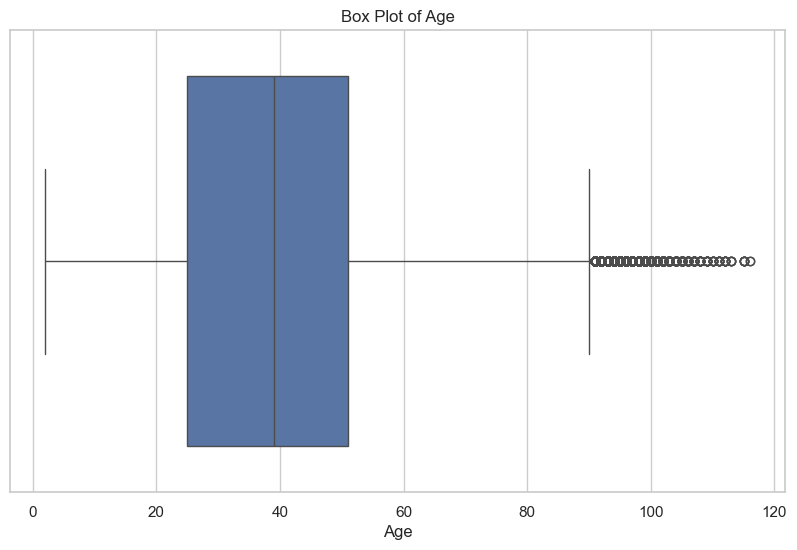

In [35]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a box plot for the age column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_renamed['age'])

# Set the title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')

# Show the plot
plt.show()


In [36]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_renamed['age'].quantile(0.25)
Q3 = df_renamed['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -14.0
Upper Bound: 90.0


In [37]:
# Identify outliers in the age column
outliers = df_renamed[(df_renamed['age'] < lower_bound) | (df_renamed['age'] > upper_bound)]

# Display the outliers
print(outliers[['customer_id', 'age']])  # Include other relevant columns if necessary


        customer_id  age
1917        1049693   95
1924        1049682   96
3680        1053264   96
4370        1054486   95
5063        1044349   92
...             ...  ...
733834       875227  103
802843       132059   91
855489        73077   93
857304        73564  104
901269       389204   91

[4084 rows x 2 columns]


In [38]:
# Cap ages above 92 to 92
df_renamed.loc[df_renamed['age'] > 92, 'age'] = 92

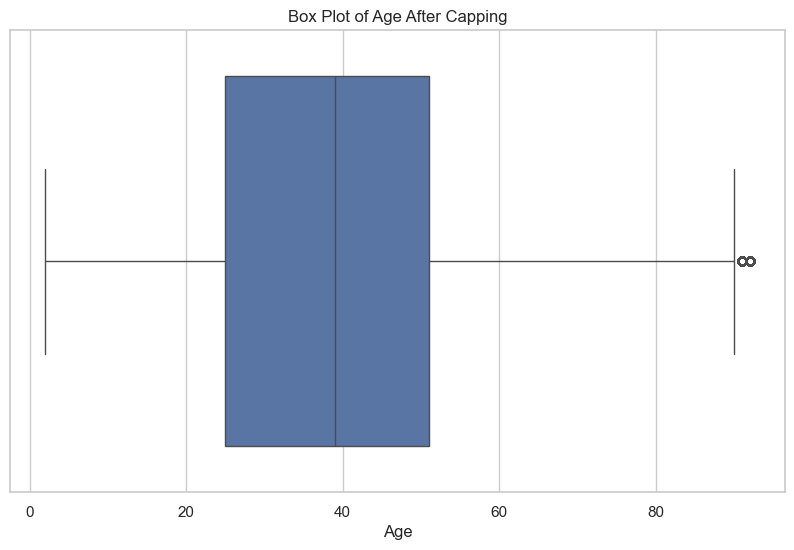

In [39]:
# box plot to visualize the age distribution after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_renamed['age'])
plt.title('Box Plot of Age After Capping')
plt.xlabel('Age')
plt.show()

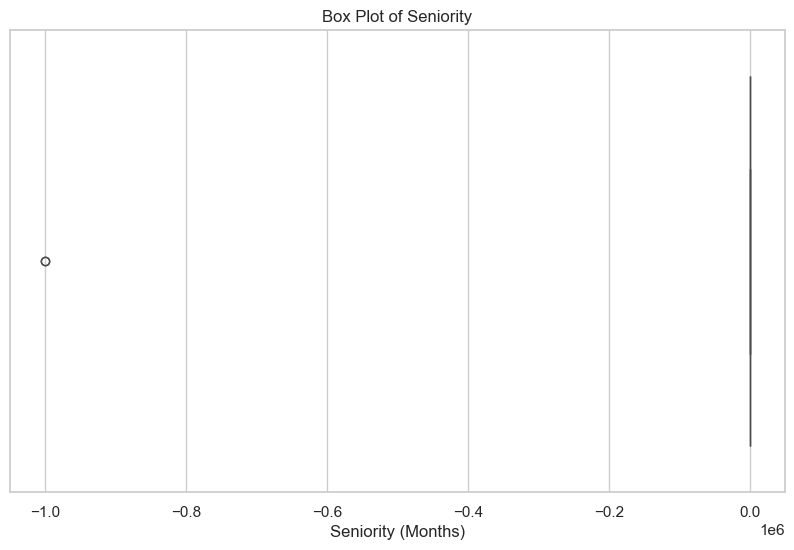

In [40]:
# box plot for the 'seniority' column to visualize any outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_renamed['seniority'])
plt.title('Box Plot of Seniority')
plt.xlabel('Seniority (Months)')
plt.show()

In [41]:
# Getting a list of seniority values below 33 and sorting them in ascending order
seniority_below_33_list = df_renamed[df_renamed['seniority'] < 33]['seniority'].tolist()
seniority_below_33_list_sorted = sorted(seniority_below_33_list)

# Displaying the first 5 elements of the sorted list
print(seniority_below_33_list_sorted[:5])





[-999999, -999999, 0, 0, 0]


In [42]:
# Replacing -999999 with 0 in the 'seniority' column
df_renamed['seniority'] = df_renamed['seniority'].replace(-999999, 0)

# Verifying if the replacement was successful
print(df_renamed['seniority'].value_counts())


seniority
21    19801
12    18894
10    17046
33    15886
45    14611
      ...  
4        38
0        37
2        31
1        26
3        22
Name: count, Length: 247, dtype: int64


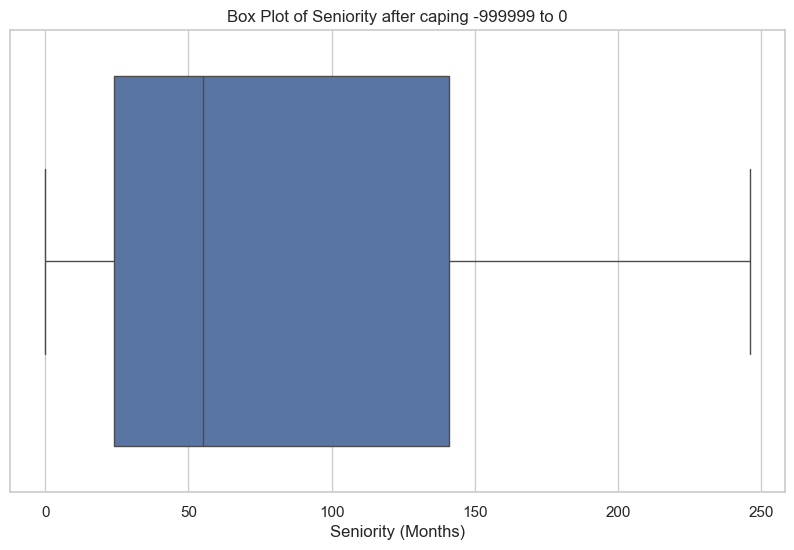

In [43]:
# box plot for the 'seniority' column to visualize any outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_renamed['seniority'])
plt.title('Box Plot of Seniority after caping -999999 to 0')
plt.xlabel('Seniority (Months)')
plt.show()

In [44]:
df_renamed.describe(include='O')

,employee_indicator,country_of_residence,gender,customer_relation_type,resident_indicator,foreigner_indicator,entry_channel,deceased_indicator
count,619174,619174,619174,619174,619174,619174,619174,619174
unique,5,113,2,3,2,2,156,2
top,N,ES,V,A,S,N,KHE,N
freq,618694,615491,339657,324117,615491,592145,212526,617588


### Feature Engineering

In [45]:
df_renamed.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

In [46]:
df_renamed.head()

,data_date,customer_id,employee_indicator,country_of_residence,gender,age,signup_date,new_customer_indicator,seniority,primary_relationship_status,customer_type_at_month_start,customer_relation_type,resident_indicator,foreigner_indicator,entry_channel,deceased_indicator,address_type,customer_activity_index,income,savings_product_indicator,guarantee_product_indicator,checking_account_product_indicator,derivative_account_product_indicator,payroll_account_product_indicator,junior_account_product_indicator,young_account_product_indicator,payroll_pension_account_indicator,pension_account_product_indicator,short_term_deposit_product_indicator,medium_term_deposit_product_indicator,long_term_deposit_product_indicator,e-account_product_indicator,mutual_fund_product_indicator,mortgage_product_indicator,pension_plan_product_indicator,loan_product_indicator,tax_collector_product_indicator,credit_card_product_indicator,securities_product_indicator,housing_product_indicator,payroll_product_indicator,pension_nomination_product_indicator,direct_debit_product_indicator
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,1,A,S,N,KHL,N,1,1,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,1,I,S,S,KHE,N,1,0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,1,I,S,N,KHE,N,1,0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,1,I,S,N,KHD,N,1,0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,1,A,S,N,KHE,N,1,1,106651.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
df_renamed[['customer_activity_index', 'new_customer_indicator', 'seniority']].head()

,customer_activity_index,new_customer_indicator,seniority
0,1,0,6
1,0,0,35
2,0,0,35
3,0,0,35
4,1,0,35


### Recency

In [48]:
# Define the recency function
def calculate_recency(row):
    if row['customer_activity_index'] == 1:
        return 0  # Active customers have recency of 0
    else:
        if row['new_customer_indicator'] == 1:
            return 50  # New inactive customers get a score of 50
        else:
            return 100  # Existing inactive customers get a score of 100

# Apply the function to the DataFrame
df_renamed['recency'] = df_renamed.apply(calculate_recency, axis=1)

# View the DataFrame with the new recency column
print(df_renamed[['customer_id', 'customer_activity_index', 'new_customer_indicator', 'recency']])

        customer_id  customer_activity_index  new_customer_indicator  recency
0           1375586                        1                       0        0
1           1050611                        0                       0      100
2           1050612                        0                       0      100
3           1050613                        0                       0      100
4           1050614                        1                       0        0
...             ...                      ...                     ...      ...
994782      1141600                        1                       0        0
995352      1150060                        0                       0      100
995403      1149999                        0                       0      100
996937      1150908                        0                       0      100
999991      1183305                        1                       0        0

[619174 rows x 4 columns]


In [49]:
# Count rows with recency = 0
recency_zero_count = df_renamed[df_renamed['recency'] == 0].shape[0]

# Count rows with recency > 0
recency_negative_count = df_renamed[df_renamed['recency'] > 0].shape[0]

print(f"Number of rows with recency = 0: {recency_zero_count}")
print(f"Number of rows with recency > 0: {recency_negative_count}")

Number of rows with recency = 0: 333074
Number of rows with recency > 0: 286100


### Frequency

In [50]:
# List of product indicator columns
product_columns = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Calculate frequency of product usage
df_renamed['frequency'] = df_renamed[product_columns].sum(axis=1)

# View the updated DataFrame with the new frequency column
df_renamed[['customer_id'] + product_columns + ['frequency']].head()


,customer_id,savings_product_indicator,guarantee_product_indicator,checking_account_product_indicator,derivative_account_product_indicator,payroll_account_product_indicator,junior_account_product_indicator,young_account_product_indicator,payroll_pension_account_indicator,pension_account_product_indicator,short_term_deposit_product_indicator,medium_term_deposit_product_indicator,long_term_deposit_product_indicator,e-account_product_indicator,mutual_fund_product_indicator,mortgage_product_indicator,pension_plan_product_indicator,loan_product_indicator,tax_collector_product_indicator,credit_card_product_indicator,securities_product_indicator,housing_product_indicator,payroll_product_indicator,pension_nomination_product_indicator,direct_debit_product_indicator,frequency
0,1375586,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1050611,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1050612,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1050613,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1050614,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
# Get distribution statistics for the frequency column
frequency_stats = df_renamed['frequency'].describe(percentiles=[0.25, 0.5, 0.75])

# Display the statistics
print(frequency_stats)


count              619174.00
mean                    1.78
std                     1.52
min                     0.00
25%                     1.00
50%                     1.00
75%                     2.00
max                    14.00
Name: frequency, dtype: float64


### Monetary value

In [52]:
# Assuming you have the frequency column already calculated in df_renamed

# Calculate the monetary value by multiplying income with frequency
df_renamed['monetary_value'] = df_renamed['income'] * df_renamed['frequency']

# View the updated DataFrame with customer_id, income, frequency, and monetary_value
df_renamed[['customer_id', 'income', 'frequency', 'monetary_value']].head()




,customer_id,income,frequency,monetary_value
0,1375586,87218.10,1,87218.10
1,1050611,35548.74,1,35548.74
2,1050612,122179.11,1,122179.11
3,1050613,119775.54,1,119775.54
4,1050614,106651.86,1,106651.86


In [53]:
# Optional: Check the distribution of the monetary value
monetary_stats = df_renamed['monetary_value'].describe()
print(monetary_stats)

count              619174.00
mean               248429.21
std                679049.48
min                     0.00
25%                 85344.42
50%                122232.66
75%                256083.08
max             220347387.60
Name: monetary_value, dtype: float64


In [54]:
df_renamed.columns

Index(['data_date', 'customer_id', 'employee_indicator',
       'country_of_residence', 'gender', 'age', 'signup_date',
       'new_customer_indicator', 'seniority', 'primary_relationship_status',
       'customer_type_at_month_start', 'customer_relation_type',
       'resident_indicator', 'foreigner_indicator', 'entry_channel',
       'deceased_indicator', 'address_type', 'customer_activity_index',
       'income', 'savings_product_indicator', 'guarantee_product_indicator',
       'checking_account_product_indicator',
       'derivative_account_product_indicator',
       'payroll_account_product_indicator', 'junior_account_product_indicator',
       'young_account_product_indicator', 'payroll_pension_account_indicator',
       'pension_account_product_indicator',
       'short_term_deposit_product_indicator',
       'medium_term_deposit_product_indicator',
       'long_term_deposit_product_indicator', 'e-account_product_indicator',
       'mutual_fund_product_indicator', 'mortgage_pro

### EDA before K-Means Clustering

In [55]:
# Summary statistics for numerical features
numerical_summary = df_renamed.describe(include='number')
print("Numerical Summary Statistics:")
print(numerical_summary)

Numerical Summary Statistics:
               customer_id                  age  new_customer_indicator  \
count            619174.00            619174.00               619174.00   
mean             775804.17                40.47                    0.00   
std              405400.24                16.99                    0.03   
min               15889.00                 2.00                    0.00   
25%              413245.25                25.00                    0.00   
50%              873682.50                39.00                    0.00   
75%             1131775.75                51.00                    0.00   
max             1379131.00                92.00                    1.00   

                 seniority  primary_relationship_status  \
count            619174.00                    619174.00   
mean                 83.52                         1.12   
std                  65.18                         3.46   
min                   0.00                         1.00   

In [56]:
# Summary statistics for categorical features
categorical_summary = df_renamed.describe(include='object')
print("\nCategorical Summary Statistics:")
print(categorical_summary)


Categorical Summary Statistics:
       employee_indicator country_of_residence  gender customer_relation_type  \
count              619174               619174  619174                 619174   
unique                  5                  113       2                      3   
top                     N                   ES       V                      A   
freq               618694               615491  339657                 324117   

       resident_indicator foreigner_indicator entry_channel deceased_indicator  
count              619174              619174        619174             619174  
unique                  2                   2           156                  2  
top                     S                   N           KHE                  N  
freq               615491              592145        212526             617588  


In [57]:
# Data types of each column
data_types = df_renamed.dtypes
print("\nData Types for Each Column:")
print(data_types)


Data Types for Each Column:
data_date                                datetime64[ns]
customer_id                                       int64
employee_indicator                               object
country_of_residence                             object
gender                                           object
age                                               int64
signup_date                              datetime64[ns]
new_customer_indicator                            int32
seniority                                         int64
primary_relationship_status                       int32
customer_type_at_month_start                      int32
customer_relation_type                           object
resident_indicator                               object
foreigner_indicator                              object
entry_channel                                    object
deceased_indicator                               object
address_type                                      int32
customer_activity_i

In [58]:
# Count of missing values in each column
missing_values = df_renamed.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values


Missing Values in Each Column:
Series([], dtype: int64)


In [59]:
# Set style for better aesthetics
sns.set(style='whitegrid')

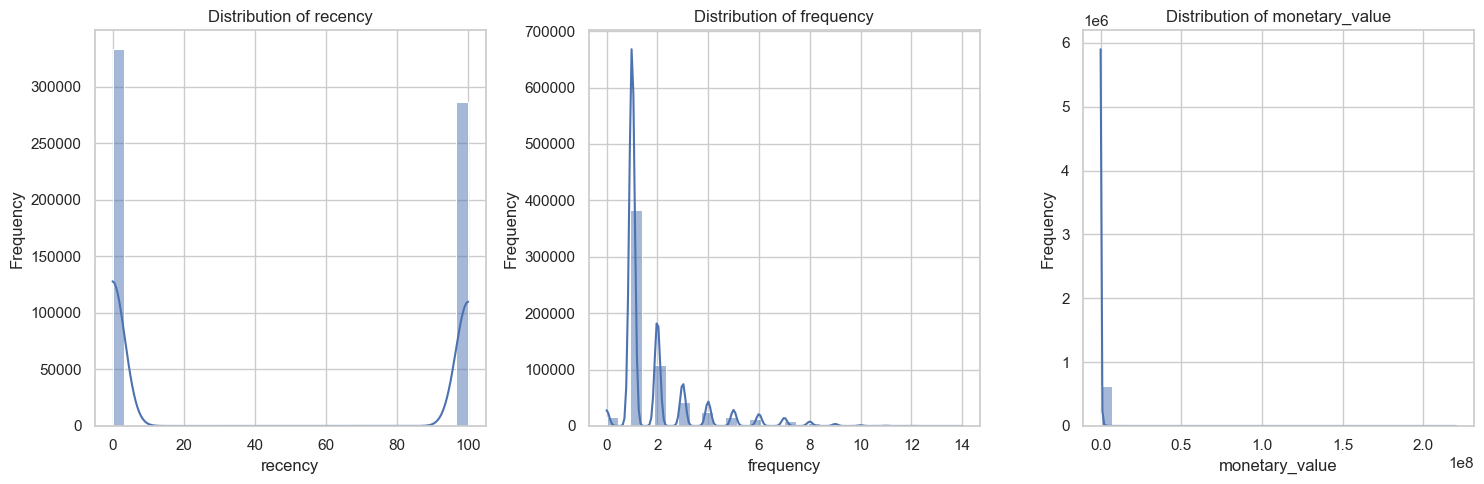

In [60]:
# Plot histograms for numerical features
numerical_features = ['recency', 'frequency', 'monetary_value'] 

plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(df_renamed[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- The bank's customer base is heterogeneous in terms of recent activity. By understanding these differences and implementing targeted strategies, the bank can improve customer retention, increase customer loyalty, and drive revenue growth.

- The right-skewed distribution suggests that the customer base is heterogeneous in terms of product usage. A large majority of customers are relatively low-product users, while a small minority of customers are high-product users.

- A large majority of customers are relatively low-spending customers, while a small minority of customers are high-spending customers.

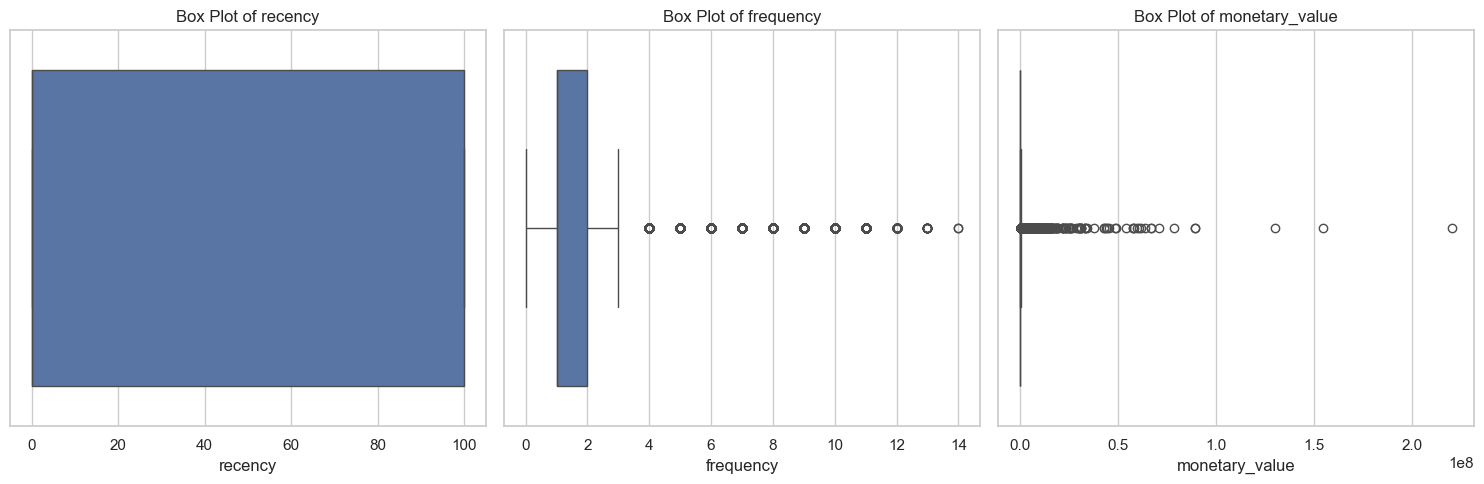

In [61]:
# Box plots for numerical features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(x=df_renamed[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


- These are outliers resulting from feaure engineering and are relevant in this analysis

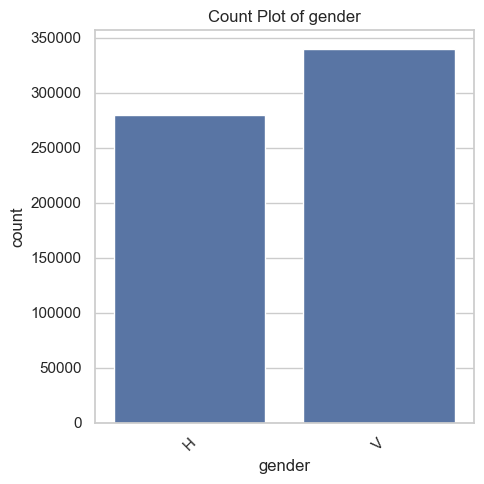

In [62]:
# Count plots for categorical features
categorical_features = ['gender'] 

plt.figure(figsize=(5, 5))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.countplot(data=df_renamed, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- there is a higher number of women than men in the dataset

In [63]:
# Drop non-numeric columns
df_numeric = df_renamed.select_dtypes(include=['number'])


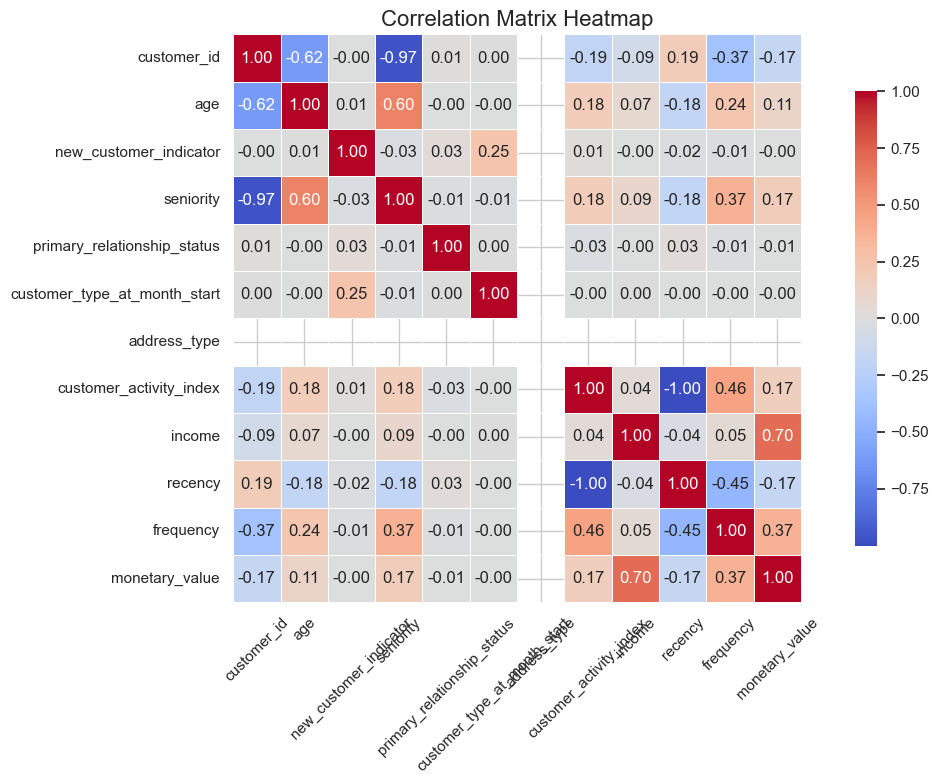

In [64]:
# List of product indicator columns to exclude
exclude_columns = [
    'savings_product_indicator',
    'guarantee_product_indicator',
    'checking_account_product_indicator',
    'derivative_account_product_indicator',
    'payroll_account_product_indicator',
    'junior_account_product_indicator',
    'young_account_product_indicator',
    'payroll_pension_account_indicator',
    'pension_account_product_indicator',
    'short_term_deposit_product_indicator',
    'medium_term_deposit_product_indicator',
    'long_term_deposit_product_indicator',
    'e-account_product_indicator',
    'mutual_fund_product_indicator',
    'mortgage_product_indicator',
    'pension_plan_product_indicator',
    'loan_product_indicator',
    'tax_collector_product_indicator',
    'credit_card_product_indicator',
    'securities_product_indicator',
    'housing_product_indicator',
    'payroll_product_indicator',
    'pension_nomination_product_indicator',
    'direct_debit_product_indicator'
]

# Select all numeric columns
df_numeric = df_renamed.select_dtypes(include=['number'])

# Drop the unwanted columns
df_numeric_cleaned = df_numeric.drop(columns=exclude_columns, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = df_numeric_cleaned.corr()

# Create a heatmap for the cleaned correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



- Age vs. Seniority: Older customers tend to have higher seniority, indicating a relationship between age and tenure.

- Income vs. Monetary Value: Customers with higher incomes tend to have higher monetary values, suggesting a relationship between income and spending.

- Frequency vs. Monetary Value: Customers who use more products or services tend to have higher monetary values, indicating a relationship between product usage and spending.

In [65]:
# Summary statistics for RFM features
rfm_summary = df_renamed[['recency', 'frequency', 'monetary_value']].describe()
print(rfm_summary)


                   recency            frequency       monetary_value
count            619174.00            619174.00            619174.00
mean                 46.20                 1.78            248429.21
std                  49.85                 1.52            679049.48
min                   0.00                 0.00                 0.00
25%                   0.00                 1.00             85344.42
50%                   0.00                 1.00            122232.66
75%                 100.00                 2.00            256083.08
max                 100.00                14.00         220347387.60


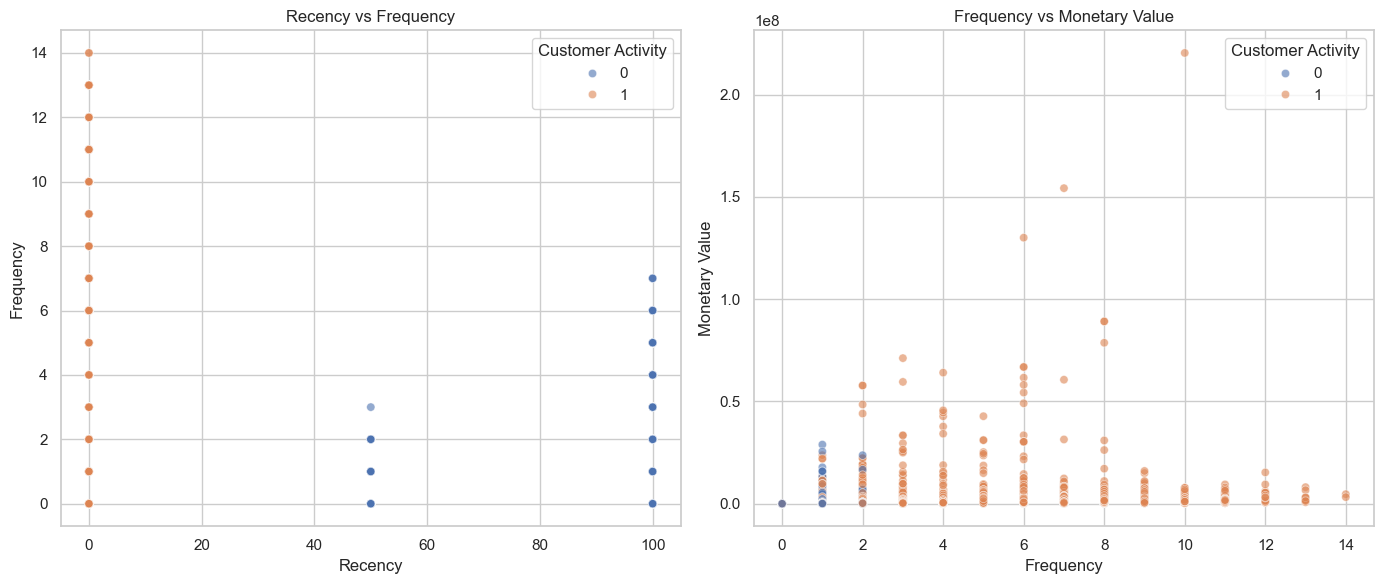

In [66]:
# Scatter plot: Recency vs Frequency
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_renamed, x='recency', y='frequency', hue='customer_activity_index', alpha=0.6)
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Customer Activity', loc='upper right')

# Scatter plot: Frequency vs Monetary Value
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_renamed, x='frequency', y='monetary_value', hue='customer_activity_index', alpha=0.6)
plt.title('Frequency vs Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Customer Activity', loc='upper right')

plt.tight_layout()
plt.show()

RECENCY VS FREQUENCY

- Low-Activity, Low-Product Customers: These customers have recently used the bank's products but have not used many different ones. This group may require targeted marketing efforts to encourage them to use more products or services.

- High-Activity, High-Product Customers: These customers have been using the bank's products for a longer time and have used a variety of them. This group may be valuable to the bank due to their high spending and loyalty.


FREQUENCY VS MONETARY VALUE

- Low-Usage, Low-Spending Customers: These customers use few products and spend little. This group may require targeted marketing efforts to encourage them to use more products or services.

- High-Usage, High-Spending Customers: These customers use many products and spend a lot. This group may be valuable to the bank due to their high spending and loyalty.

- Moderate-Usage, Moderate-Spending Customers: These customers have moderate product usage and spending. This group may represent an opportunity for up-selling and cross-selling to increase their spending.
